In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Load Data

In [2]:
# Load data
# lyrics_df = pd.read_csv("data/lyrics.csv")
sentiment_df = pd.read_csv("data/lyrics_emotions.csv")
audio_df = pd.read_csv("data/audio_features.csv")
merged_df = audio_df.merge(sentiment_df, on='musicbrainz_id')

## Missing values

In [3]:
merged_df.isnull().sum()

musicbrainz_id              0
duration_seconds            0
sample_rate                 0
tempo                       0
loudness                    0
danceability                0
energy                      0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
spectral_centroid           0
spectral_rolloff            0
spectral_bandwidth          0
spectral_flatness           0
zero_crossing_rate          0
rms_energy                  0
tempo_variability           0
f0_mean                     0
mel_mean                    0
dynamic_range               0
mfcc_1                      0
mfcc_2                      0
mfcc_3                      0
mfcc_4                      0
mfcc_5                      0
mfcc_6                      0
mfcc_7                      0
mfcc_8                      0
mfcc_9                      0
mfcc_10                     0
mfcc_11                     0
mfcc_12   

In [5]:
# merged_df['genius_lyrics'] = merged_df['genius_lyrics'].fillna("")
# merged_df['lastfm_wiki_summary'] = merged_df['lastfm_wiki_summary'].fillna("")
# merged_df['lastfm_wiki_content'] = merged_df['lastfm_wiki_content'].fillna("")

In [6]:
merged_df.isnull().sum()

musicbrainz_id              0
genius_lyrics               0
genius_url                  0
lastfm_wiki_summary         0
lastfm_wiki_content         0
goemotion_sadness           0
goemotion_realization       0
goemotion_neutral           0
goemotion_love              0
goemotion_grief             0
goemotion_amusement         0
goemotion_gratitude         0
goemotion_disappointment    0
goemotion_surprise          0
goemotion_nervousness       0
goemotion_embarrassment     0
goemotion_remorse           0
goemotion_joy               0
goemotion_fear              0
goemotion_excitement        0
goemotion_anger             0
goemotion_pride             0
goemotion_caring            0
goemotion_disgust           0
goemotion_confusion         0
goemotion_optimism          0
goemotion_relief            0
goemotion_desire            0
goemotion_annoyance         0
goemotion_approval          0
goemotion_admiration        0
goemotion_disapproval       0
goemotion_curiosity         0
nrc_anger 

## Features

In [4]:
cols = merged_df.columns
[col for col in cols]

['musicbrainz_id',
 'duration_seconds',
 'sample_rate',
 'tempo',
 'loudness',
 'danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'spectral_centroid',
 'spectral_rolloff',
 'spectral_bandwidth',
 'spectral_flatness',
 'zero_crossing_rate',
 'rms_energy',
 'tempo_variability',
 'f0_mean',
 'mel_mean',
 'dynamic_range',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'spectral_contrast_1',
 'spectral_contrast_2',
 'spectral_contrast_3',
 'spectral_contrast_4',
 'spectral_contrast_5',
 'spectral_contrast_6',
 'spectral_contrast_7',
 'chroma_cens_1',
 'chroma_cens_2',
 'chroma_cens_3',
 'chroma_cens_4',
 'chroma_cens_5',
 'chroma_cens_6',
 'chroma_cens_7',
 'chroma_cens_8',
 'chroma_cens_9',
 'chroma_cens_10',
 'chroma_cens_11',
 'chroma_cens_12',
 'tonnetz_1',
 'tonnetz_2',
 'tonnetz_3',
 'tonnetz_4',
 'tonnetz_5',
 'tonnetz_6',
 'goe

### Audio Features

In [5]:
audio_features = audio_df.drop('musicbrainz_id', axis=1).columns
print(audio_features)
print(len(audio_features))

Index(['duration_seconds', 'sample_rate', 'tempo', 'loudness', 'danceability',
       'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'spectral_centroid', 'spectral_rolloff',
       'spectral_bandwidth', 'spectral_flatness', 'zero_crossing_rate',
       'rms_energy', 'tempo_variability', 'f0_mean', 'mel_mean',
       'dynamic_range', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'spectral_contrast_1', 'spectral_contrast_2',
       'spectral_contrast_3', 'spectral_contrast_4', 'spectral_contrast_5',
       'spectral_contrast_6', 'spectral_contrast_7', 'chroma_cens_1',
       'chroma_cens_2', 'chroma_cens_3', 'chroma_cens_4', 'chroma_cens_5',
       'chroma_cens_6', 'chroma_cens_7', 'chroma_cens_8', 'chroma_cens_9',
       'chroma_cens_10', 'chroma_cens_11', 'chroma_cens_12', 'tonnetz_1',
       'tonnetz_2', 'tonnetz_3', 'tonnetz_4', 'tonnetz_5'

### Sentiments Features

In [6]:
sentiment_features = sentiment_df.drop('musicbrainz_id', axis=1).columns
print(sentiment_features)
print(len(sentiment_features))

Index(['goemotion_sadness', 'goemotion_realization', 'goemotion_neutral',
       'goemotion_love', 'goemotion_grief', 'goemotion_amusement',
       'goemotion_gratitude', 'goemotion_disappointment', 'goemotion_surprise',
       'goemotion_nervousness', 'goemotion_embarrassment', 'goemotion_remorse',
       'goemotion_joy', 'goemotion_fear', 'goemotion_excitement',
       'goemotion_anger', 'goemotion_pride', 'goemotion_caring',
       'goemotion_disgust', 'goemotion_confusion', 'goemotion_optimism',
       'goemotion_relief', 'goemotion_desire', 'goemotion_annoyance',
       'goemotion_approval', 'goemotion_admiration', 'goemotion_disapproval',
       'goemotion_curiosity', 'nrc_anger', 'nrc_anticipation', 'nrc_disgust',
       'nrc_fear', 'nrc_joy', 'nrc_negative', 'nrc_positive', 'nrc_sadness',
       'nrc_surprise', 'nrc_trust', 'textblob_polarity',
       'textblob_subjectivity', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound'],
      dtype='object')
44


## Normalize and Cluster Songs

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


In [18]:

# Select features
selected_features = list(audio_features) + list(sentiment_features) 
X = merged_df[selected_features].dropna()  # Drop rows with missing data

In [36]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering with KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df_clean = merged_df.loc[X.index].copy().reset_index(drop=True)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\robot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [37]:
df_clean.head(1)

,musicbrainz_id,duration_seconds,sample_rate,tempo,loudness,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,spectral_centroid,spectral_rolloff,spectral_bandwidth,spectral_flatness,zero_crossing_rate,rms_energy,tempo_variability,f0_mean,mel_mean,dynamic_range,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6,spectral_contrast_7,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,chroma_cens_12,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6,goemotion_sadness,goemotion_realization,goemotion_neutral,goemotion_love,goemotion_grief,goemotion_amusement,goemotion_gratitude,goemotion_disappointment,goemotion_surprise,goemotion_nervousness,goemotion_embarrassment,goemotion_remorse,goemotion_joy,goemotion_fear,goemotion_excitement,goemotion_anger,goemotion_pride,goemotion_caring,goemotion_disgust,goemotion_confusion,goemotion_optimism,goemotion_relief,goemotion_desire,goemotion_annoyance,goemotion_approval,goemotion_admiration,goemotion_disapproval,goemotion_curiosity,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,textblob_polarity,textblob_subjectivity,vader_neg,vader_neu,vader_pos,vader_compound,cluster
0,00b1397d-7f3e-4c59-bb42-ccd7fa17ee10,38.672857,44100,129.199219,0.917355,0.5,0.189481,0.066829,0.933171,0.737652,0.023772,0.223563,2851.507128,5338.838465,2809.097895,0.06149,0.066829,0.189481,12.293727,359.435047,9.648206,0.493671,-260.894745,81.008942,-58.195499,-0.449299,-16.097624,-10.797815,-25.408665,-1.547891,-21.260399,-16.773787,4.776502,-7.276707,-18.5681,11.090056,15.688511,22.036189,23.310601,23.239349,26.298186,36.266886,0.171266,0.386161,0.114239,0.10085,0.073253,0.1741,0.210199,0.124123,0.344556,0.14665,0.262724,0.192607,-0.211667,-0.159559,-0.155867,-0.019994,0.009904,-0.05473,0.4178,0.2908,0.2323,0.022,0.0107,0.0073,0.0022,0.0022,0.0022,0.0021,0.0018,0.0012,0.0011,0.0008,0.0006,0.0005,0.0005,0.0005,0.0005,0.0004,0.0004,0.0004,0.0003,0.0003,0.0003,0.0002,0.0002,0.0002,0,5,0,0,5,1,6,1.0,5.0,6.0,0.119,0.224,0.169,0.831,0.0,-0.9217,0


In [43]:
def recommend_similar_songs(song_id, top_n=5):
    if song_id not in df_clean['musicbrainz_id'].values:
        return "Song ID not found."

    target_idx = df_clean[df_clean['musicbrainz_id'] == song_id].index[0]
    target_cluster = df_clean.loc[target_idx, 'cluster']
    
    # Get songs from the same cluster
    cluster_df = df_clean[df_clean['cluster'] == target_cluster]
    print(cluster_df.index)
    cluster_X = X_scaled[cluster_df.index]

    # Compute similarity
    target_vector = X_scaled[target_idx].reshape(1, -1)
    similarities = cosine_similarity(target_vector, cluster_X)[0]

    cluster_df = cluster_df.copy()
    cluster_df['similarity'] = similarities
    cluster_df = cluster_df.sort_values(by='similarity', ascending=False)

    return cluster_df[['musicbrainz_id', 'similarity']].head(top_n)




In [39]:
df_clean.shape, X_scaled.shape

((1090, 105), (1090, 103))

### Test Run

In [44]:
# Example usage
recommendations = recommend_similar_songs(song_id='a31eab71-a326-4a2e-abc0-3233a1f534e5')
print(recommendations)

Index([   3,    4,    5,    6,   40,   42,   48,   58,   59,   61,
       ...
       1001, 1031, 1042, 1045, 1048, 1058, 1059, 1064, 1083, 1085],
      dtype='int64', length=134)
                           musicbrainz_id  similarity
673  a31eab71-a326-4a2e-abc0-3233a1f534e5    1.000000
286  41aad600-b29c-403c-bb8d-f84a8af48f38    0.635105
261  3c8d6f8e-4712-4ced-9b77-0f921f9e1c54    0.635105
524  7cb2c52e-f122-438d-9a39-6971a6a65c09    0.600114
186  2bfc39fb-c9a8-403a-8513-42980a1b1777    0.565982


## Cluster Visualization

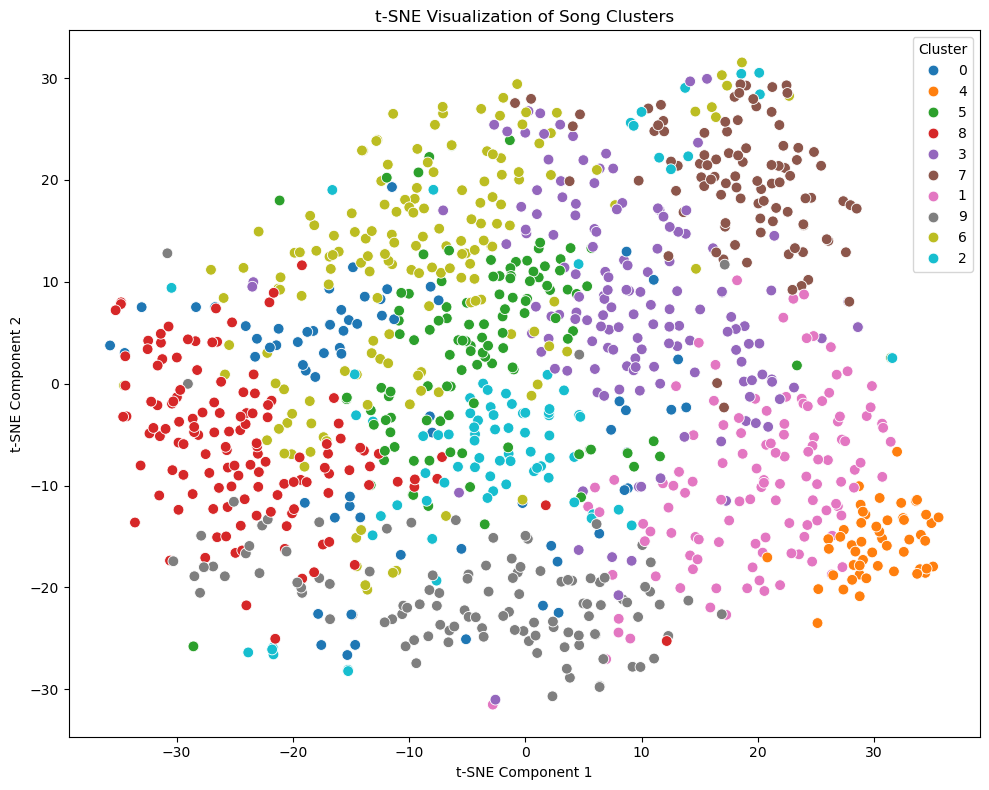

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Reduce features to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'x': X_2d[:, 0],
    'y': X_2d[:, 1],
    'cluster': df_clean['cluster'].astype(str)  # Convert to string for discrete coloring
})

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='x', y='y', hue='cluster', palette='tab10', s=60)
plt.title('t-SNE Visualization of Song Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
